# Exploratory Data Analysis of "La Redoute" reviews data from TrustedShops

#### Required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Import review data of La Redoute

In [2]:
file = "redoute.csv"
df = pd.read_csv(file, sep = ";", index_col = 0)
df.head()

,rating,title,comment,createdAt,transaction,updatedAt,totalLikeCount,customerCity,SupplierReply,SupplierReplyDate
id,,,,,,,,,,
rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99,4,Facilte,"Facilte, sollicitations dosées...qualité..on p...",2023-10-05,2023-09-23,NaN,NaN,NaN,NaN,NaN
rev-b54467c4-4769-42e3-a74a-c72c000059f9,4,Jolie table mais plus pour 6 que pour 8,Livraison impeccable avec possibilité de prend...,2023-10-02,2023-09-11,NaN,NaN,NaN,NaN,NaN
rev-b480f537-524e-491e-9f85-74405332c047,4,Achat d'un canapé La Redoute intérieurs…,Achat d'un canapé La Redoute intérieurs le 6/9...,2023-09-18,2023-09-06,NaN,NaN,NaN,NaN,NaN
rev-f04626f5-846d-41ca-9866-46573746f75b,4,excellent site mais des changements qui compl...,je commande depuis longtemps chez la redoute; ...,2023-10-13,2023-10-02,NaN,NaN,NaN,NaN,NaN
rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb,5,"Comme d'habitude, aucun souci et rapidité d'ex...","Comme d'habitude, aucun souci et rapidité d'ex...",2023-09-21,2023-09-15,NaN,NaN,NaN,NaN,NaN


Remove irrelevent features : title, updatedAt, totalLikeCount, customerCity

In [3]:
df = df.drop(["title", "createdAt", "updatedAt",	"totalLikeCount", "customerCity", "SupplierReplyDate"], axis = 1).reset_index()
df.head()

,id,rating,comment,transaction,SupplierReply
0,rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99,4,"Facilte, sollicitations dosées...qualité..on p...",2023-09-23,NaN
1,rev-b54467c4-4769-42e3-a74a-c72c000059f9,4,Livraison impeccable avec possibilité de prend...,2023-09-11,NaN
2,rev-b480f537-524e-491e-9f85-74405332c047,4,Achat d'un canapé La Redoute intérieurs le 6/9...,2023-09-06,NaN
3,rev-f04626f5-846d-41ca-9866-46573746f75b,4,je commande depuis longtemps chez la redoute; ...,2023-10-02,NaN
4,rev-d3bb4eb5-ea0f-45db-afb5-313eaeaed6cb,5,"Comme d'habitude, aucun souci et rapidité d'ex...",2023-09-15,NaN


#### Remove lines without comments

In [5]:
df = df.dropna(subset = ["comment"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27399 entries, rev-cc907a30-4fb0-4e55-a4a1-307b89eb0d99 to rev-8e0a67aa-a803-4fb9-8859-d29d9aa58226
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             27399 non-null  int64  
 1   title              27399 non-null  object 
 2   comment            27399 non-null  object 
 3   createdAt          27399 non-null  object 
 4   transaction        23545 non-null  object 
 5   updatedAt          32 non-null     float64
 6   totalLikeCount     8 non-null      float64
 7   customerCity       2810 non-null   object 
 8   SupplierReply      5806 non-null   object 
 9   SupplierReplyDate  5806 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.3+ MB


#### Distribution of rating

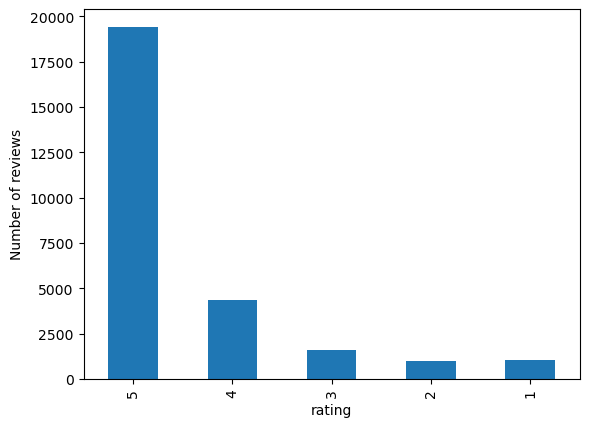

In [6]:
rating = df["rating"].value_counts().sort_index(ascending = False)
x = rating.index.values
rating.plot(kind = "bar")
plt.ylabel("Number of reviews")
plt.show()

### Supplier Reply and Rating

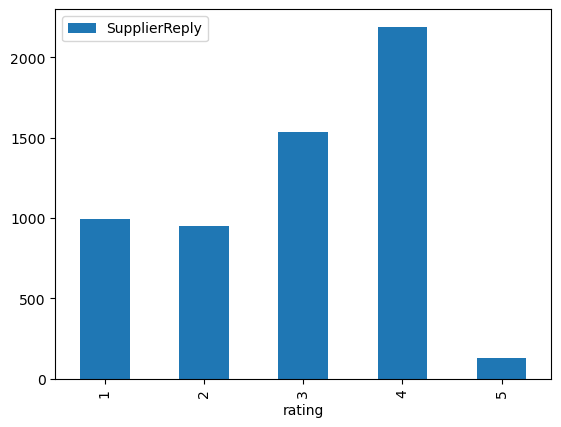

In [25]:
df[["SupplierReply", "rating"]].groupby("rating").count().plot(kind = "bar")
plt.show()

There seams to exist a trends for ratings under five.

### Any relationship between the rating and the length of a comment?

In [7]:
df["cmtLenght"] = df["comment"].apply(lambda x: len(x))
df["cmtLenght"].sort_values()

27912       1
27906       1
27907       1
27908       1
27909       1
         ... 
4036     1550
7523     1553
32489    1583
14038    1853
13725    1964
Name: cmtLenght, Length: 27399, dtype: int64

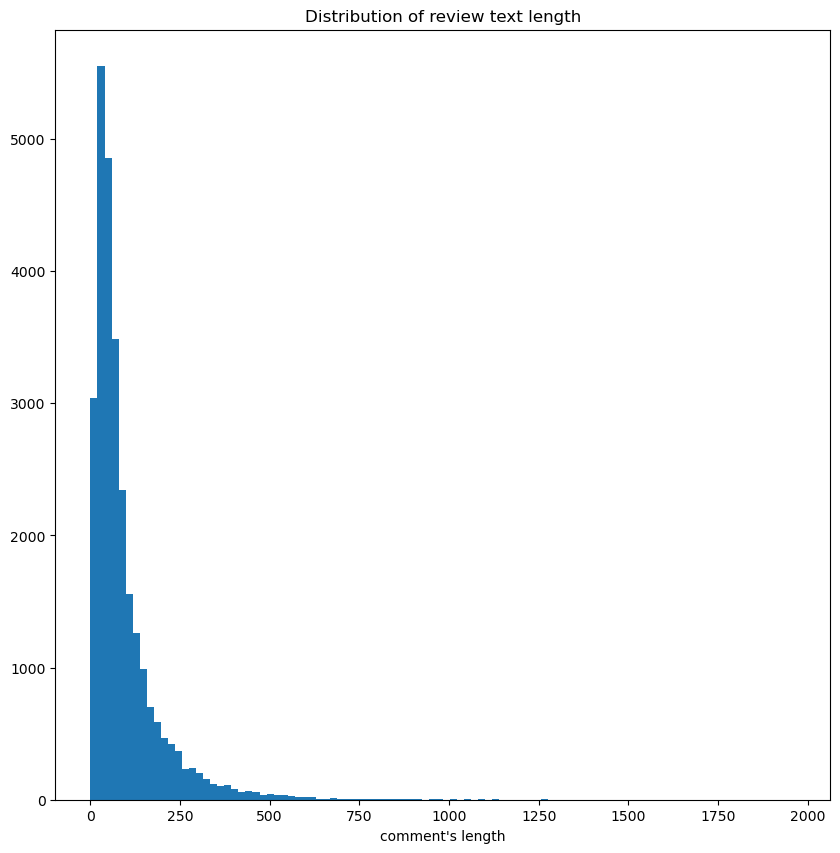

In [9]:
plt.figure(figsize = (10, 10))
plt.hist(df["cmtLenght"], bins = 100)
plt.xlabel("comment's length")
plt.title("Distribution of review text length")
plt.show()

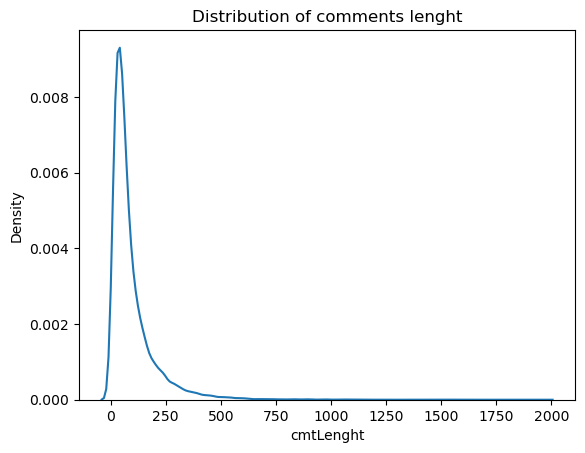

In [35]:

sns.kdeplot(data = df, x = "cmtLenght")
plt.title ("Distribution of comments lenght")
plt.show()


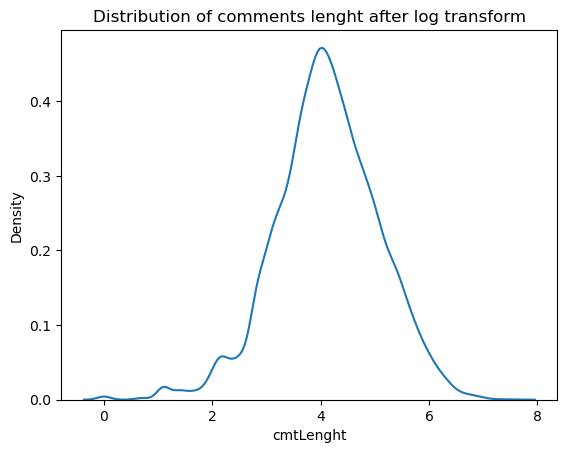

In [39]:
## Distribution of the log tranformed of lenght comments
sns.kdeplot(data = np.log(df["cmtLenght"]))
plt.title ("Distribution of comments lenght after log transform")
plt.show()

In [11]:
df["cmtLenght"].describe()

count    27399.000000
mean        94.650206
std        105.654032
min          1.000000
25%         34.000000
50%         61.000000
75%        115.000000
max       1964.000000
Name: cmtLenght, dtype: float64

The distribution of reviews comments lenght is positively skewed, with a median lenght of 61.
So w'll have to transform this data before using for regression-based models.


## Analyze the relationship between comment's lenght and rating

#### Average comment's lenght par rating class

,cmtLenght
rating,
1,207.236538
2,209.503055
3,185.473750
4,108.744828
5,72.181243


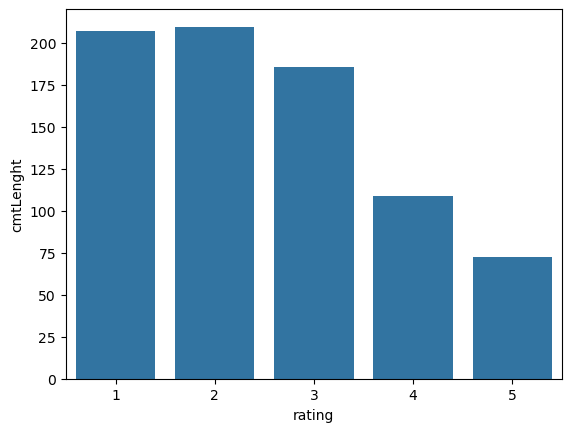

In [10]:
avg_cmt_lenght = df[["cmtLenght", "rating"]].groupby("rating").mean()
display(avg_cmt_lenght)
sns.barplot(data = avg_cmt_lenght, x = avg_cmt_lenght.index, y = "cmtLenght")
plt.show()

On average, reviews with rating equal or less than 3 tend to lenghtier comments on average

#### scatter plot of comment's lenght versus rating

/Users/dkcentral/anaconda3/envs/dst_pjt/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


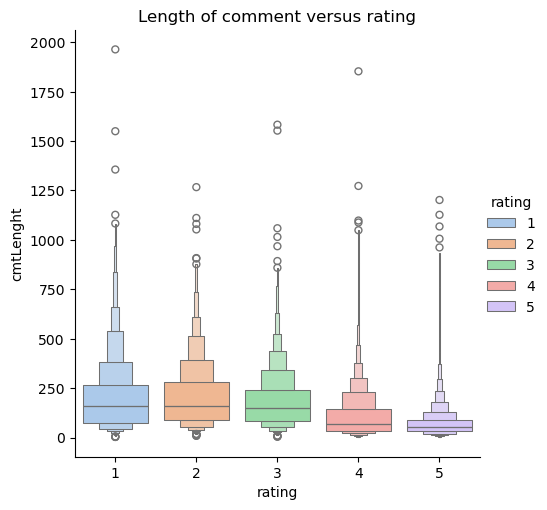

In [13]:

sns.catplot(data=df, x="rating", y="cmtLenght", hue = "rating", kind = "boxen", palette = "pastel")
plt.title("Length of comment versus rating")
plt.show()

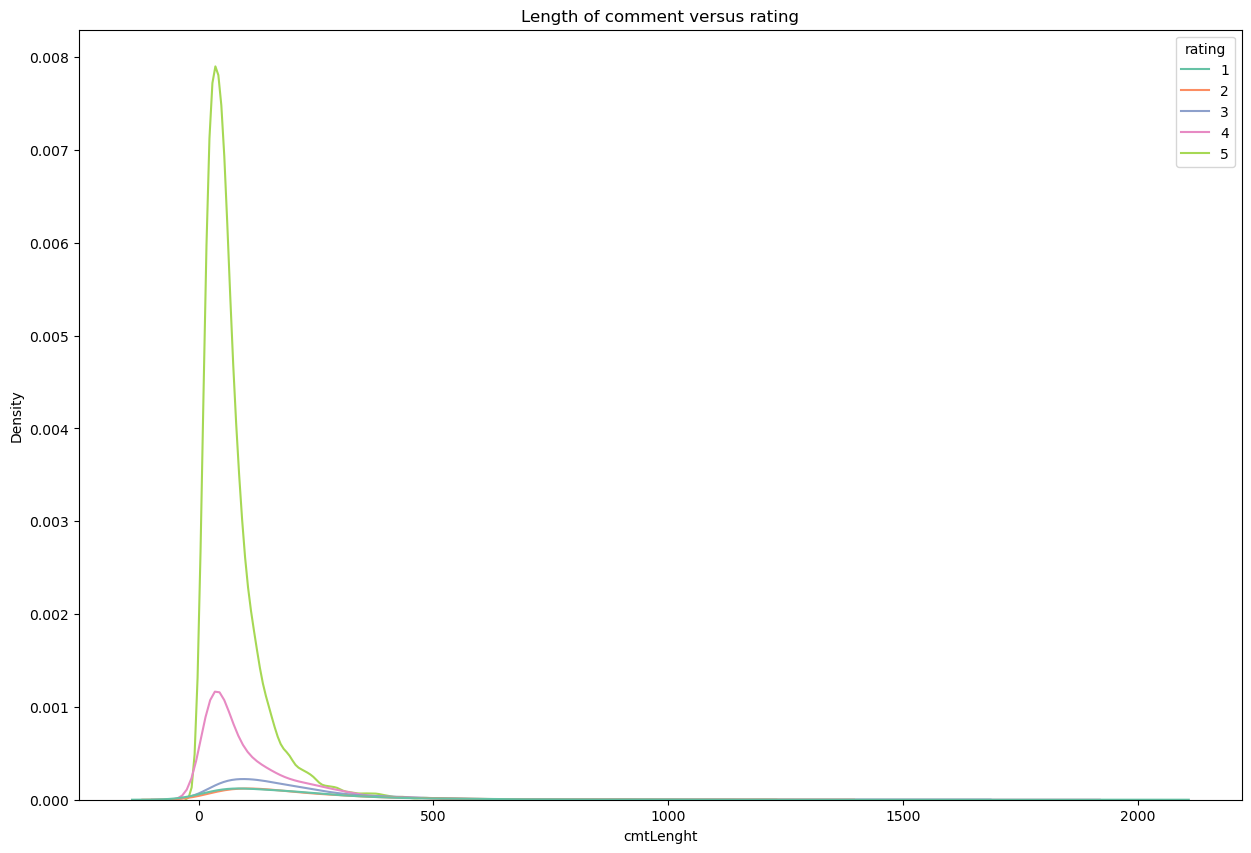

In [34]:
plt.figure(figsize=(15,10))
sns.kdeplot(data=df, x="cmtLenght", hue = "rating", palette = "Set2")
plt.title("Length of comment versus rating")
plt.show()

#### Box plot of comment's length versus ratings

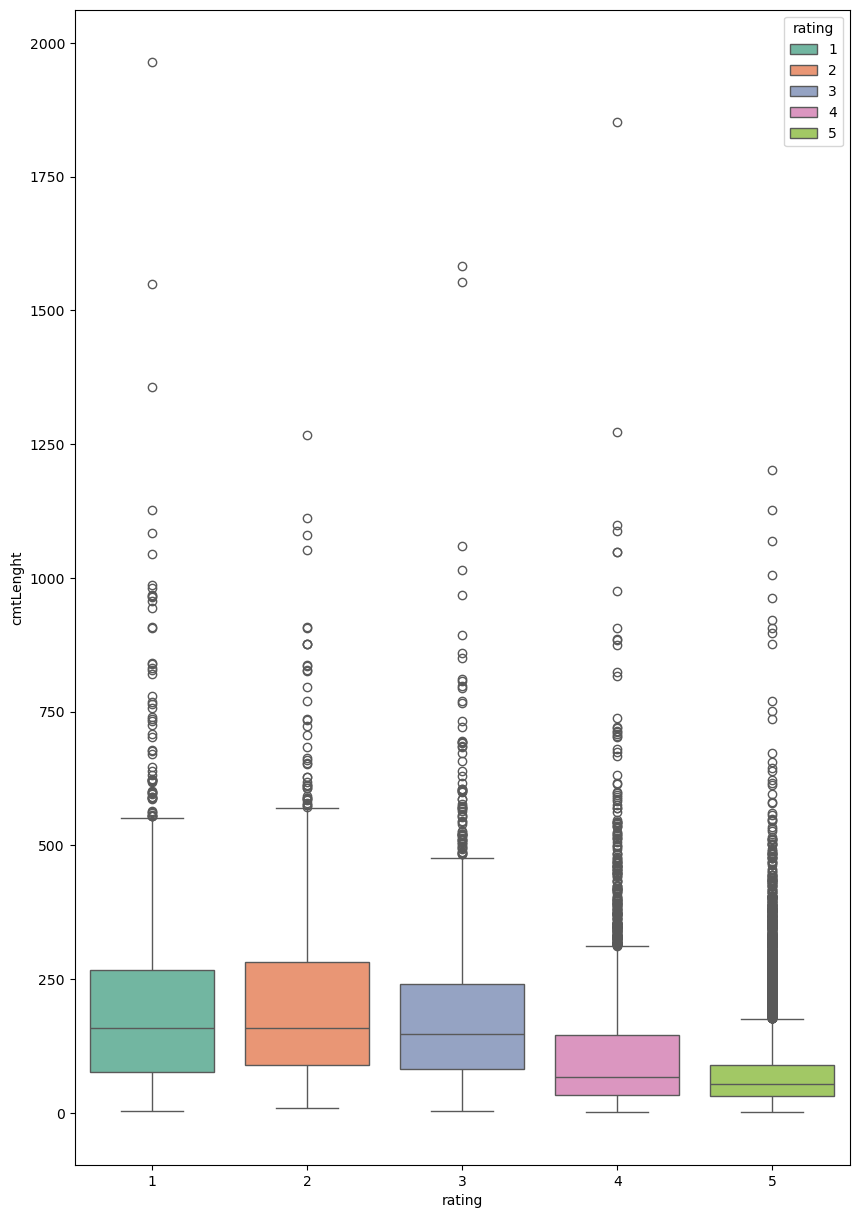

In [16]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df, x = "rating", y="cmtLenght", hue="rating", palette = "Set2")
plt.show()

From the Box plot we observe :

- Positive skewness
- lot of outliers
- The variable will have to be transform (log or normalize)  before using it in regression-based models

## Visual analysis after log transformation

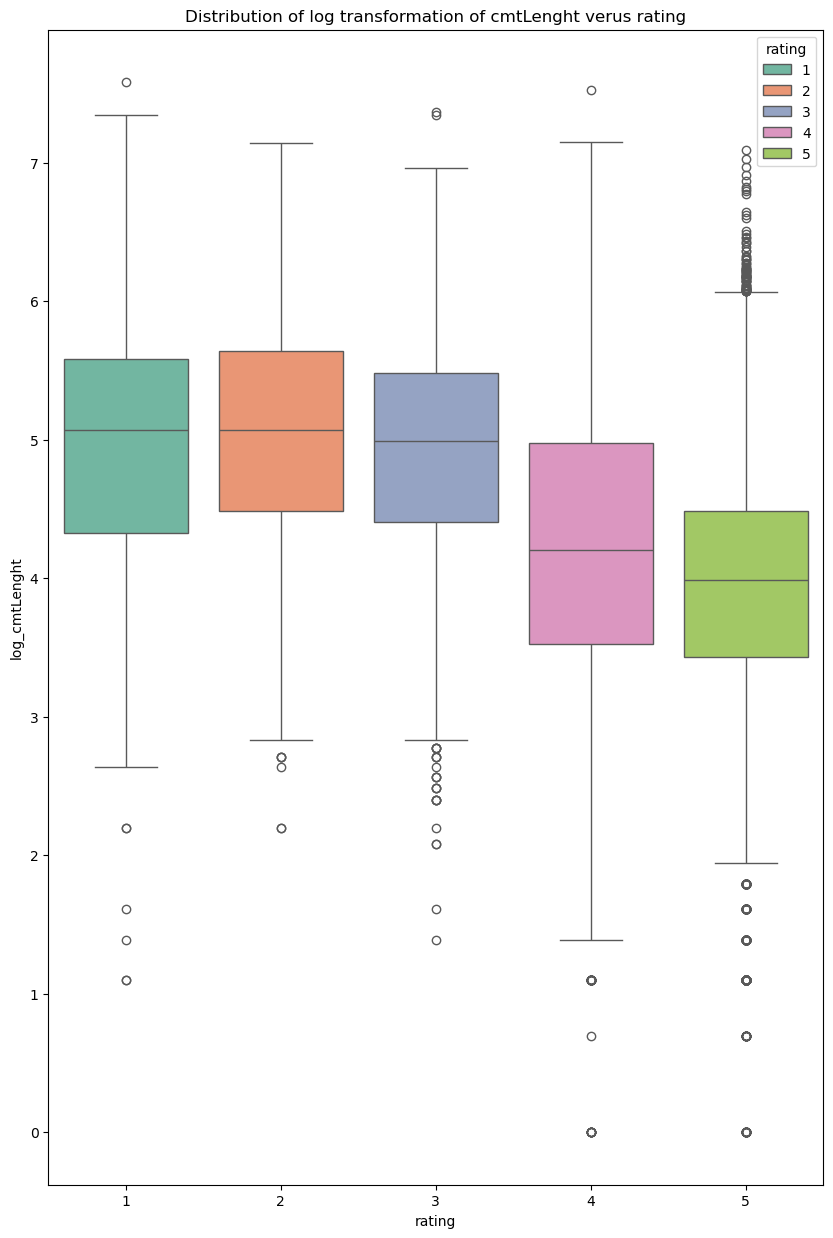

In [8]:
df["log_cmtLenght"] = np.log(df["cmtLenght"])
plt.figure(figsize=(10,15))
plt.title("Distribution of log transformation of cmtLenght verus rating")
sns.boxplot(data=df, x = "rating", y="log_cmtLenght", hue="rating", palette = "Set2")
plt.show()

The distribution now is more balanced with less outliers

<Axes: >

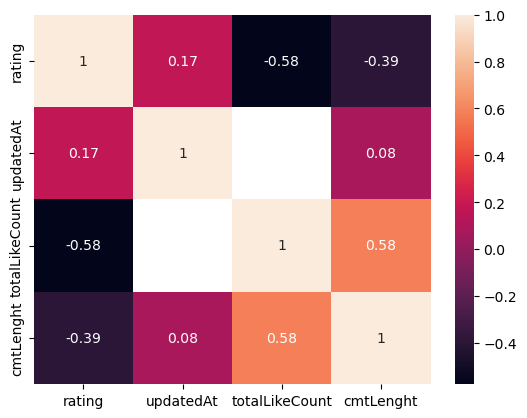

In [19]:
sns.heatmap(df.select_dtypes(include = ["int", "float"]).corr(), annot = True)

Rajouter un wordcloud

In [11]:

from wordcloud import WordCloud
from PIL import Image

In [12]:
len(df.head(10))

10

In [15]:
text = ""
for i in range(len(df.head(10))):
    text = text +" "+df["comment"][i]
text

" Facilte, sollicitations dosées...qualité..on pourrait cependant améliorer le volet recap commandes sur l'appli avec au moment de la livraison, lorsque vos propres équipes ou des intervenants autres communiquent avec nous un rappel systématique du contenu de la commande et son numéro la Redoute. Les sociétés de livraison ont leur code, c'est bien mais quand, comme moi, on commande beaucoup avec des modes de livraison différents et de manière rythmes c est sportif. Par ailleurs ce serait bien que vos sociétés de livraison, quand elles livrent pour vous, alignent le look de leurs mails ou autres type de communication sur le vôtre.  Le service serait parfait de bout en bout.  Concernant les marques autres que les vôtres que vous distribuez et qui se chargent de livrer vous annoncez parfois des dates de livraison qui ne correspondent pas ...en général c'est livré avant certes mais nous achetons chez vois donc vous devriez être informés par elles dès vraies dates de livraison...\nPour nous

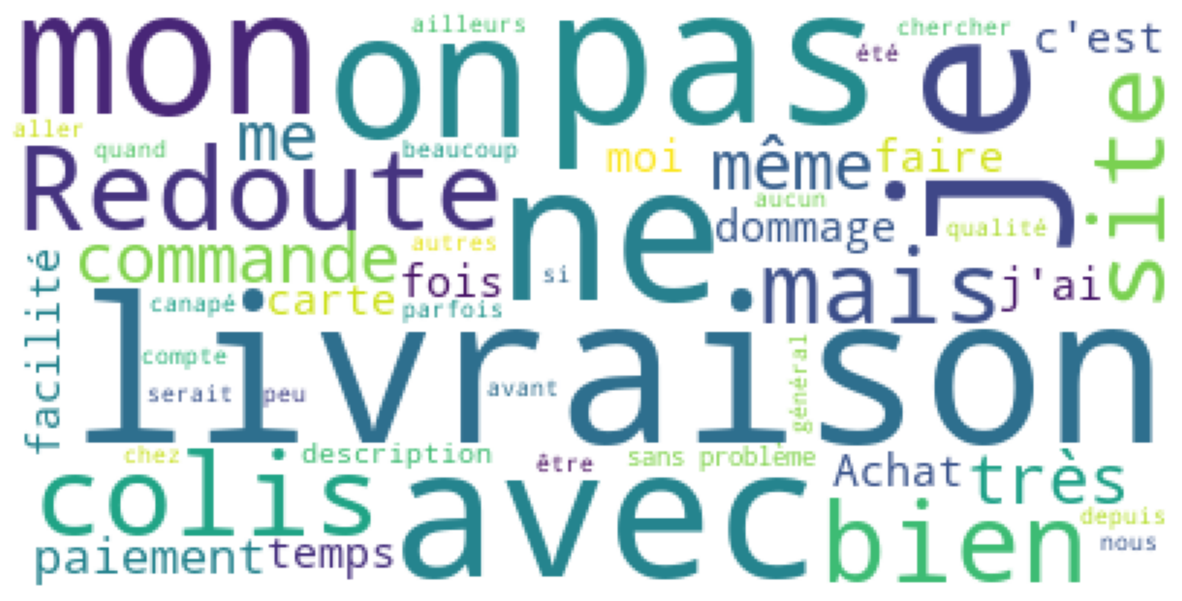

In [17]:
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

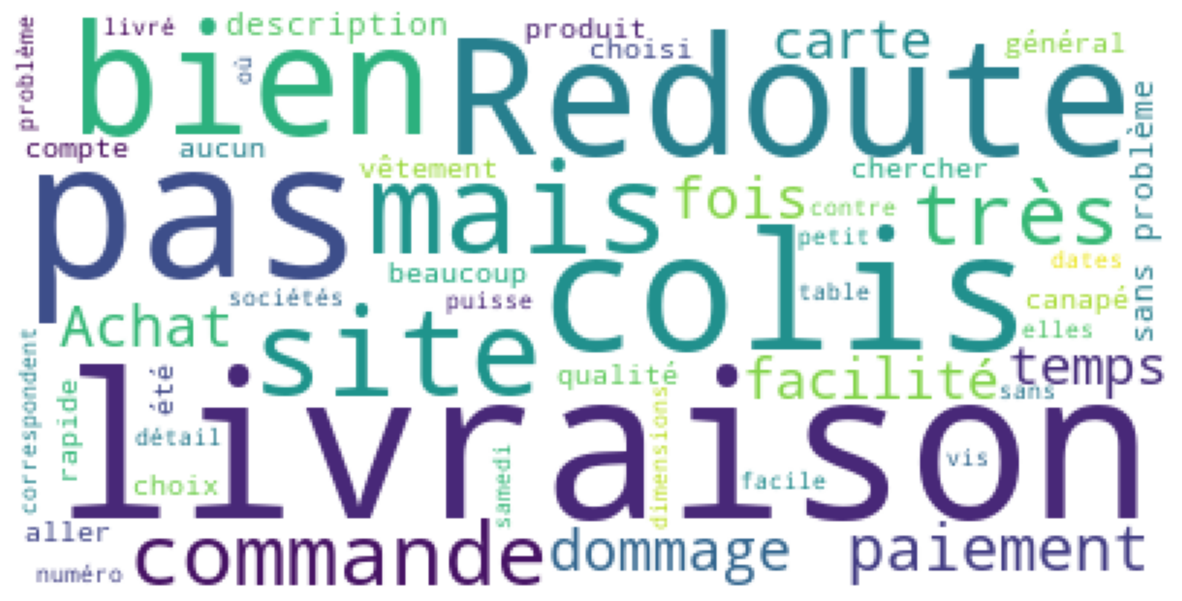

In [22]:
exclure_mots = ["on", "faire", "même", "pourrait", "n'y", "mn", "bout", "vos", "vôtre", "c'est", "cependant", "ont", "dû", "votre", "mes", 'ça', 'cela', 'jour', 'quand', 'peu','ailleurs', "j'ai", "j", "n'ai", "peu", "ne", "avec", 'mon', 'me', 'je', 'nous', 'depuis', 'être', 'si', 'moi', 'autres', 'avant', 'c', 'est', 'chez','serait', 'parfois', 'd', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();